In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils import shuffle
%matplotlib inline

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/nelson-wu/employee-attrition-ml/master/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print (dataset.head)

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

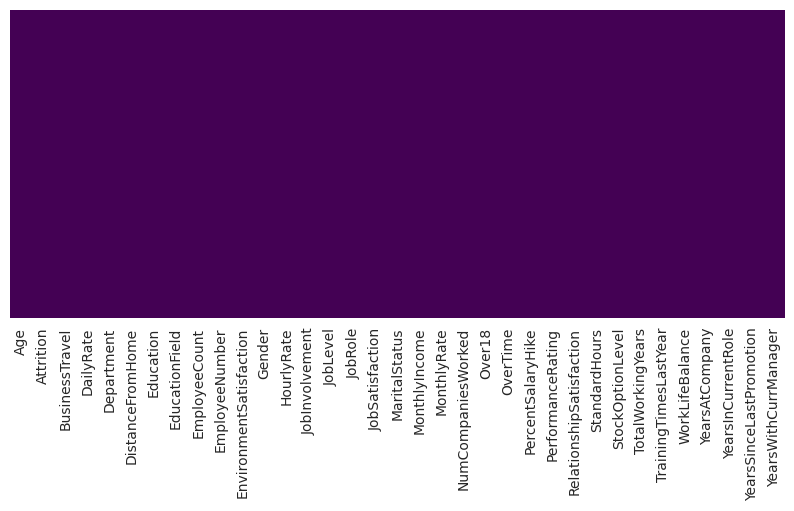

In [ ]:
plt.figure(figsize =(10, 4))
sns.heatmap(dataset.isnull(),
            yticklabels = False,
            cbar = False,
            cmap ='viridis')

<Axes: xlabel='Attrition', ylabel='count'>

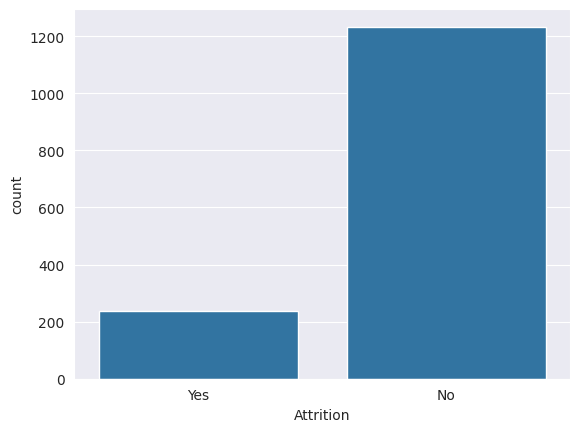

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition',
              data = dataset)

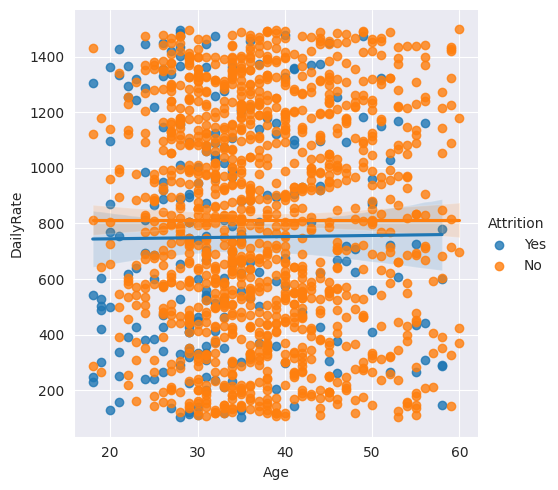

In [ ]:
sns.lmplot(x = 'Age',
           y = 'DailyRate',
           hue = 'Attrition',
           data = dataset)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

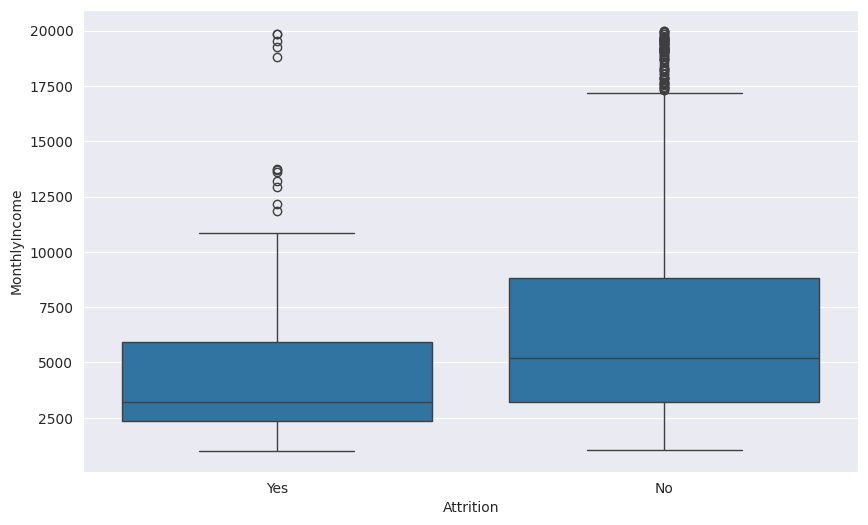

In [ ]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',
            x ='Attrition',
            data = dataset)

In [ ]:
dataset.drop('EmployeeCount',
             axis = 1,
             inplace = True)
dataset.drop('StandardHours',
             axis = 1,
             inplace = True)
dataset.drop('EmployeeNumber',
             axis = 1,
             inplace = True)
dataset.drop('Over18',
             axis = 1,
             inplace = True)

print(dataset.shape)

(1470, 31)


In [ ]:
y = dataset.iloc[:, 1]
X = dataset

X.drop('Attrition',
       axis = 1,
       inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [ ]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'],
									prefix ='BusinessTravel')

dum_Department = pd.get_dummies(dataset['Department'],
								prefix ='Department')

dum_EducationField = pd.get_dummies(dataset['EducationField'],
								prefix ='EducationField')

dum_Gender = pd.get_dummies(dataset['Gender'],
						prefix ='Gender', drop_first = True)

dum_JobRole = pd.get_dummies(dataset['JobRole'],

							prefix ='JobRole')

dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'],

								prefix ='MaritalStatus')

dum_OverTime = pd.get_dummies(dataset['OverTime'],
							prefix ='OverTime', drop_first = True)

# Adding these dummy variable to input X
X = pd.concat([X, dum_BusinessTravel, dum_Department,
			dum_EducationField, dum_Gender, dum_JobRole,
			dum_MaritalStatus, dum_OverTime], axis = 1)

# Removing the categorical data
X.drop(['BusinessTravel', 'Department', 'EducationField',
	'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
	axis = 1, inplace = True)

print(X.shape)
print(y.shape)


(1470, 49)
(1470,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

   X, y, test_size = 0.25, random_state = 40)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,
                            criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

def print_score(clf, X_train, y_train,
                X_test, y_test,
                train=True):

    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(
            y_train, clf.predict(X_train))))

        print("Confusion Matrix: \n {}\n".format(confusion_matrix(
            y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train,
                              cv=10, scoring='accuracy')

        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")

    elif train == False:

        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(
            classification_report(y_test, clf.predict(X_test))))

        print("Confusion Matrix: \n {}\n".format(
            confusion_matrix(y_test, clf.predict(X_test))))

        print("accuracy score: {0:.4f}\n".format(
            accuracy_score(y_test, clf.predict(X_test))))

        print("-----------------------------------------------------------")

print_score(rf, X_train, y_train,
            X_test, y_test,
            train=True)

print_score(rf, X_train, y_train,
            X_test, y_test,
            train=False)

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       922
           1       1.00      0.84      0.92       180

    accuracy                           0.97      1102
   macro avg       0.99      0.92      0.95      1102
weighted avg       0.98      0.97      0.97      1102


Confusion Matrix: 
 [[922   0]
 [ 28 152]]

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0142
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       311
           1       0.73      0.14      0.24        57

    accuracy                           0.86       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.84      0.86      0.82       368


Confusion Matrix: 
 [[308   3]
 [ 49   8]]

accuracy score: 0.8587

---------------------

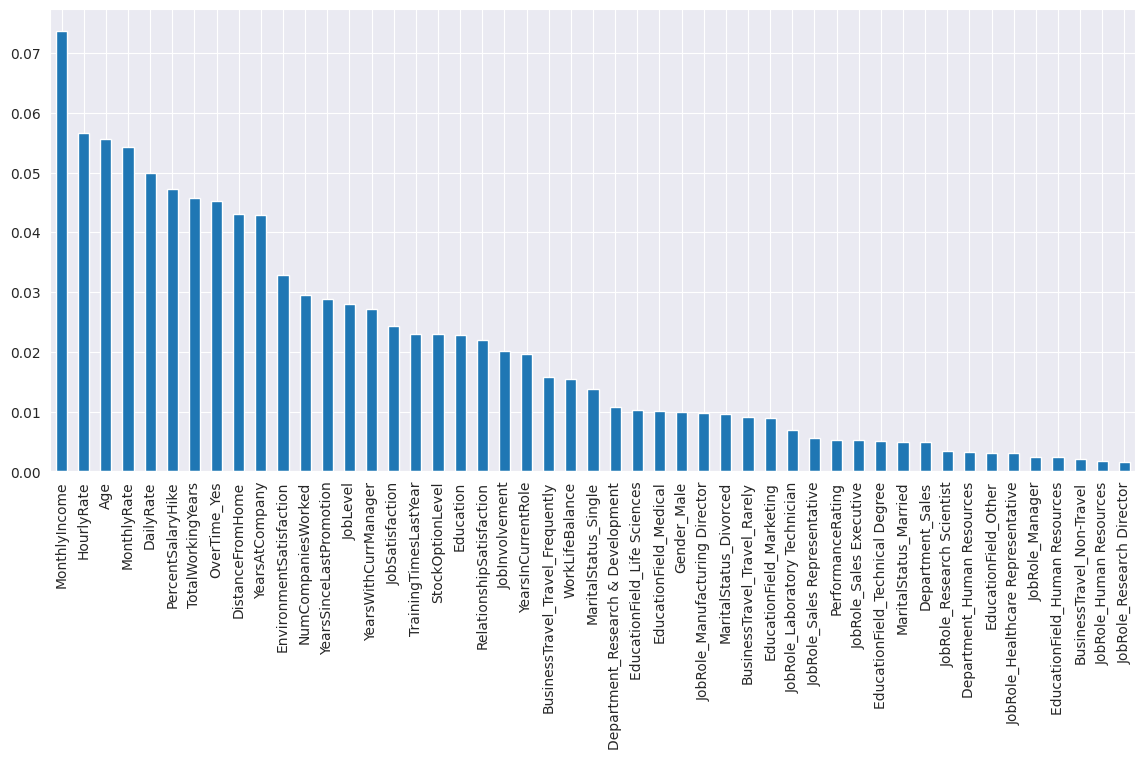

In [ ]:
pd.Series(rf.feature_importances_,
         index = X.columns).sort_values(ascending = False).plot(kind = 'bar',
                                                                figsize = (14,6));

In [ ]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.8777


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Train the model with GridSearch
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_accuracy:.4f}")

# Evaluate on the test set using the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy_test:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.6}
Best cross-validation accuracy: 0.8742
Test set accuracy: 0.8741
